In [103]:
import pickle
import numpy as np

In [104]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [105]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [106]:
type(test_data)

list

In [107]:
type(train_data)

list

In [108]:
len(train_data)

10000

In [109]:
len(test_data)

1000

In [110]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [111]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [112]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [113]:
train_data[0][2]

'no'

In [114]:
all_data = test_data + train_data

In [115]:
len(all_data)

11000

In [116]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [117]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [118]:
vocab.add('no')

In [119]:
vocab.add('yes')

In [120]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [121]:
vocab_len = len(vocab) + 1

In [122]:
vocab_len

38

In [123]:
all_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [124]:
# LONGEST STORY
all_story_lens = [len(data[0]) for data in all_data]

In [125]:
max_story_len = max(all_story_lens)

In [126]:
max_question_len = max([len(data[1]) for data in all_data])

In [127]:
max_question_len

6

In [128]:
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer

In [129]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [130]:
tokenizer.word_index

{'journeyed': 1,
 'there': 2,
 'the': 3,
 'bathroom': 4,
 'apple': 5,
 'back': 6,
 'yes': 7,
 'football': 8,
 'bedroom': 9,
 'hallway': 10,
 'got': 11,
 'discarded': 12,
 'kitchen': 13,
 'is': 14,
 'dropped': 15,
 'daniel': 16,
 'put': 17,
 'garden': 18,
 '.': 19,
 'left': 20,
 'sandra': 21,
 'in': 22,
 'up': 23,
 'mary': 24,
 'to': 25,
 'down': 26,
 'took': 27,
 'moved': 28,
 'picked': 29,
 'milk': 30,
 'no': 31,
 '?': 32,
 'went': 33,
 'office': 34,
 'travelled': 35,
 'john': 36,
 'grabbed': 37}

In [131]:
train_story_text = []
train_question_text = []
train_answers = []

In [132]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [133]:
# train_story_text

In [134]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [135]:
len(train_story_seq)

10000

In [136]:
len(train_story_text)

10000

In [137]:
# train_story_text

In [138]:
# train_story_seq

In [139]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len, max_question_len=max_question_len):

    # STORIES = X
    X = []
    # QUESTIONS Xq
    Xq = []
    # Y CORRECT ANSWER (yes/no)
    Y = []

    for story, query, answer in data:

        # for each story
        # [23,14,....]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index)+1)

        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return (pad_sequences(X, maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [140]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [141]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [142]:
inputs_test

array([[ 0,  0,  0, ...,  3,  9, 19],
       [ 0,  0,  0, ...,  3, 18, 19],
       [ 0,  0,  0, ...,  3, 18, 19],
       ...,
       [ 0,  0,  0, ...,  3,  5, 19],
       [ 0,  0,  0, ...,  3, 18, 19],
       [ 0,  0,  0, ...,  5,  2, 19]], dtype=int32)

In [143]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
tokenizer.word_index['yes']

7

In [145]:
tokenizer.word_index['no']

31

In [146]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [147]:
from keras.models import Sequential, Model

In [148]:
from keras.layers import Embedding

In [149]:
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [150]:
# PLACEHOLDER shape=(max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [151]:
# vocab_len
vocab_size = len(vocab) + 1

In [152]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

# OUTPUT
# (samples, story_maxlen, embedding_dim)

In [153]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# OUTPUT
# (samples, story_maxlen, max_question_len)

In [154]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# (samples, query_maxlen, embedding_dim)

In [155]:
# ENCODED <--- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [156]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [157]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [158]:
answer = concatenate([response, question_encoded])

In [159]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [160]:
answer = LSTM(32)(answer)

In [161]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) # (samples, vocab_size) # YES/NO 0000

In [162]:
answer = Activation('softmax')(answer)

In [163]:
model = Model([input_sequence, question], answer)

In [164]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [165]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_6 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [166]:
history = model.fit([inputs_train, queries_train], answers_train, batch_size=32, epochs=100, validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/100
313/313 [==============================] - 4s 7ms/step - loss: 0.9102 - accuracy: 0.4935 - val_loss: 0.6961 - val_accuracy: 0.5030
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.7064 - accuracy: 0.4939 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6963 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6949 - accuracy: 0.5093 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6943 - accuracy: 0.5026 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6946 - accuracy: 0.5027 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6941 - accuracy: 0.5035 - val_loss: 0.6934 - val_accuracy: 0.5030

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


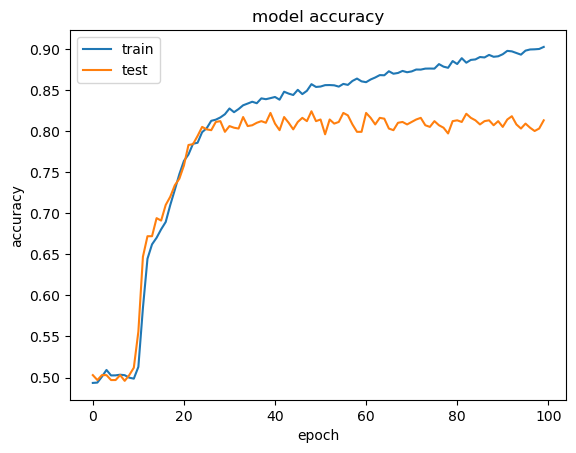

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [168]:
# model.save('mybrandnewmodel.h5')

In [169]:
# model.load_weights('chatbot_10.h5')
model.load_weights('mybrandnewmodel.h5')

In [170]:
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 2ms/step


In [171]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [172]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [173]:
test_data[0][2]

'no'

In [174]:
pred_results[0]

array([1.4327198e-15, 1.3525088e-15, 1.2906663e-15, 1.3819074e-15,
       1.3729275e-15, 1.4243603e-15, 1.2318256e-15, 5.0841965e-02,
       1.4117564e-15, 1.5762924e-15, 1.2805539e-15, 1.3217071e-15,
       1.4731441e-15, 1.5116613e-15, 1.2734516e-15, 1.3571861e-15,
       1.4089802e-15, 1.7748036e-15, 1.2364063e-15, 1.2961926e-15,
       1.4803887e-15, 1.4731441e-15, 1.3514773e-15, 1.5581718e-15,
       1.4063598e-15, 1.2656931e-15, 1.4182986e-15, 1.3604932e-15,
       1.5822507e-15, 1.5581480e-15, 1.6258703e-15, 9.4915801e-01,
       1.4503384e-15, 1.5380635e-15, 1.2516012e-15, 1.4430923e-15,
       1.3892967e-15, 1.3258987e-15], dtype=float32)

In [175]:
val_max = np.argmax(pred_results[0])

In [176]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [177]:
k

'no'

In [178]:
pred_results[0][val_max]

0.949158

In [179]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [180]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [181]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [182]:
my_question = "Is the football in the garden ?"

In [183]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [184]:
my_data = [(my_story.split(), my_question.split(), 'yes')]

In [185]:
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [186]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 36,
        20,  3, 13, 19, 21, 15,  3,  8, 22,  3, 18, 19]], dtype=int32)

In [187]:
pred_results = model.predict(([my_story, my_ques]))

1/1 [==============================] - 0s 27ms/step


In [188]:
val_max = np.argmax(pred_results[0])

In [189]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [190]:
k

'yes'

In [191]:
pred_results[0][val_max]

0.9973349